<a href="https://colab.research.google.com/github/shivam-singh-git/Tweet-recognition-using-TensorFlow/blob/main/tweet_recognition_using_TensorFlow%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
pip install nlp

In [36]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random
import pandas as pd

In [37]:
def show_history(h):
  epochs_trained = len(h.history['loss'])
  plt.figure(figsize = (16,6))

  plt.subplot(1,2,1)
  plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label = 'Training')
  plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label = 'Validation')
  plt.ylim([0. , 1.])
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(range(0, epochs_trained), h.history.get('loss'), label = 'Training')
  plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label = 'Validation')
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.legend()
  plt.show()

def show_confusion_matrix(y_true, y_pred, classes):
  from sklearn.metrics import confusion_matrix
  cm = confusion_matrix(y_true, y_pred, normalize=True)

  plt.figure(figsize=(8, 8))
  sp = plt.subplot(1,1,1)
  ctx = sp.matshow(cm)
  plt.xticks(list(range(0, 6), labels = classes))
  plt.yticks(list(range(0, 6), labels = classes))
  plt.colorbar(ctx)
  plt.show()



In [38]:
train = pd.read_csv('training.csv')
test = pd.read_csv('test.csv')
val = pd.read_csv('validation.csv')
print(train.shape)
print(test.shape)
print(val.shape)

(16000, 2)
(2000, 2)
(2000, 2)


In [39]:
train

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


In [40]:
test

,text,label
0,im feeling rather rotten so im not very ambiti...,0
1,im updating my blog because i feel shitty,0
2,i never make her separate from me because i do...,0
3,i left with my bouquet of red and yellow tulip...,1
4,i was feeling a little vain when i did this one,0
...,...,...
1995,i just keep feeling like someone is being unki...,3
1996,im feeling a little cranky negative after this...,3
1997,i feel that i am useful to my people and that ...,1
1998,im feeling more comfortable with derby i feel ...,1


In [41]:
val

,text,label
0,im feeling quite sad and sorry for myself but ...,0
1,i feel like i am still looking at a blank canv...,0
2,i feel like a faithful servant,2
3,i am just feeling cranky and blue,3
4,i can have for a treat or if i am feeling festive,1
...,...,...
1995,im having ssa examination tomorrow in the morn...,0
1996,i constantly worry about their fight against n...,1
1997,i feel its important to share this info for th...,1
1998,i truly feel that if you are passionate enough...,1


In [42]:
def get_tweet(data):
  tweets = [x for x in data['text']]
  labels = [x for x in data['label']]
  return tweets, labels

In [43]:
tweets, labels = get_tweet(train)

In [44]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [45]:
tokenizer = Tokenizer(num_words = 10000, oov_token = "<UNK>")
tokenizer.fit_on_texts(tweets)

In [46]:
tokenizer.texts_to_sequences([tweets[0]])

[[2, 139, 3, 679]]

(array([  8.,  45., 310., 488., 539., 625., 626., 629., 613., 636., 654.,
        655., 608., 622., 609., 603., 559., 535., 530., 510., 452., 430.,
        382., 385., 330., 327., 336., 317., 238., 208., 200., 200., 167.,
        157., 141., 144., 120., 117., 117.,  88.,  96.,  72.,  66.,  66.,
         65.,  52.,  37.,  43.,  30.,  32.,  31.,  26.,  30.,  20.,  23.,
         14.,   9.,  10.,   4.,   4.,   4.,   1.,   4.,   1.]),
 array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
        28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40.,
        41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53.,
        54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66.]),
 <BarContainer object of 64 artists>)

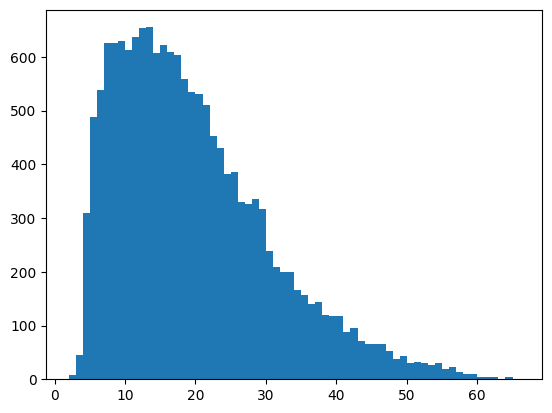

In [47]:
lengths = [len(x.split(' ')) for x in tweets]
plt.hist(lengths, bins = len(set(lengths)))

In [48]:
max_len = 50
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [49]:
def get_sequences(tokenizer, tweets):
  sequence = tokenizer.texts_to_sequences(tweets)
  padded = pad_sequences(sequence, maxlen = max_len, padding = 'post', truncating = 'post')
  return padded

In [50]:
padded_train_sequences = get_sequences(tokenizer, tweets)

In [51]:
padded_train_sequences[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [52]:
test_tweets, test_labels = get_tweet(test)

In [53]:
padded_test_sequences = get_sequences(tokenizer, test_tweets)

In [54]:
val_tweets, val_labels = get_tweet(val)

In [55]:
padded_val_sequences = get_sequences(tokenizer, val_tweets)

In [56]:
type(val_labels)

list

In [57]:
train_labels = labels

In [58]:
train_labels= np.array(train_labels)
test_labels= np.array(test_labels)
val_labels = np.array(val_labels)

In [59]:
print(padded_train_sequences.shape)
print(padded_test_sequences.shape)
print(padded_val_sequences.shape)
print(train_labels.shape)
print(test_labels.shape)
print(val_labels.shape)

(16000, 50)
(2000, 50)
(2000, 50)
(16000,)
(2000,)
(2000,)


In [60]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length = max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(6, activation = 'softmax')
    ])
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 16)            160000    
                                                                 
 bidirectional_2 (Bidirecti  (None, 50, 40)            5920      
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 40)                9760      
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 6)                 246       
                                                                 
Total params: 175926 (687.21 KB)
Trainable params: 175926 (687.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
history = model.fit(
    padded_train_sequences, train_labels,
    validation_data = (padded_val_sequences, val_labels),
    epochs = 20,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 2                    )
        ]
    )

Epoch 1/20
500/500 [==============================] - 53s 87ms/step - loss: 1.3289 - accuracy: 0.4804 - val_loss: 0.9749 - val_accuracy: 0.6070
Epoch 2/20
500/500 [==============================] - 25s 50ms/step - loss: 0.6731 - accuracy: 0.7519 - val_loss: 0.5918 - val_accuracy: 0.7870
Epoch 3/20
500/500 [==============================] - 24s 49ms/step - loss: 0.4073 - accuracy: 0.8579 - val_loss: 0.5038 - val_accuracy: 0.8300
Epoch 4/20
500/500 [==============================] - 25s 51ms/step - loss: 0.2716 - accuracy: 0.9120 - val_loss: 0.4664 - val_accuracy: 0.8390
Epoch 5/20
500/500 [==============================] - 24s 49ms/step - loss: 0.1940 - accuracy: 0.9362 - val_loss: 0.4805 - val_accuracy: 0.8475
Epoch 6/20
500/500 [==============================] - 23s 46ms/step - loss: 0.1478 - accuracy: 0.9514 - val_loss: 0.4126 - val_accuracy: 0.8725
Epoch 7/20
500/500 [==============================] - 25s 50ms/step - loss: 0.1063 - accuracy: 0.9654 - val_loss: 0.4189 - val_accuracy:

In [63]:
model.evaluate(padded_test_sequences, test_labels)

63/63 [==============================] - 1s 13ms/step - loss: 0.4694 - accuracy: 0.8685


[0.4694197177886963, 0.8684999942779541]